In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score


import numpy as np 
import pandas as pd 


In [3]:
# Load the data
df = pd.read_csv('synthetic_personal_finance_dataset.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_int

In [4]:
print(df.isnull().sum())

user_id                        0
age                            0
gender                         0
education_level                0
employment_status              0
job_title                      0
monthly_income_usd             0
monthly_expenses_usd           0
savings_usd                    0
has_loan                       0
loan_type                  19429
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
region                         0
record_date                    0
dtype: int64


In [5]:
print(df.describe())

                age  monthly_income_usd  monthly_expenses_usd   savings_usd  \
count  32424.000000        32424.000000          32424.000000  3.242400e+04   
mean      43.415865         4027.863185           2419.444709  2.437520e+05   
std       14.978246         1916.773353           1388.893084  1.915772e+05   
min       18.000000          500.000000            150.010000  6.359600e+02   
25%       30.000000         2657.795000           1397.497500  8.629155e+04   
50%       43.000000         3997.740000           2219.575000  2.017003e+05   
75%       56.000000         5351.607500           3254.037500  3.589662e+05   
max       69.000000        12404.050000          10082.710000  1.237774e+06   

       loan_amount_usd  loan_term_months  monthly_emi_usd  \
count     32424.000000      32424.000000     32424.000000   
mean     100114.735992         58.500000      3092.992339   
std      152536.588635        104.865373      6478.939776   
min           0.000000          0.000000    

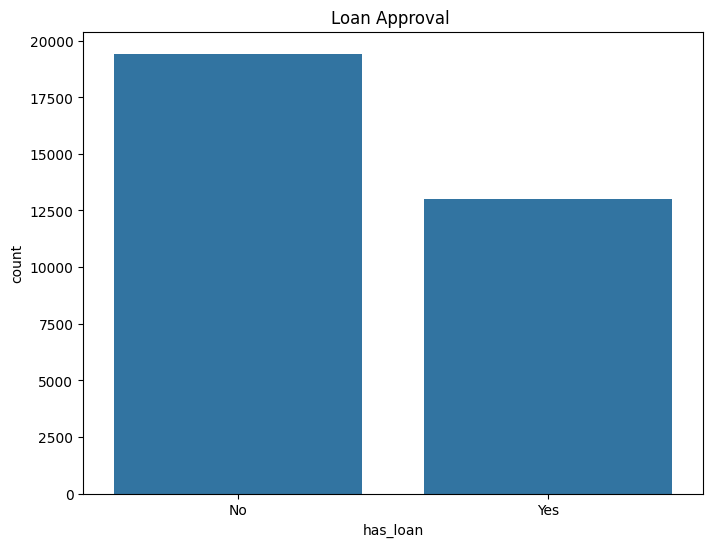

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='has_loan', data=df)
plt.title('Loan Approval ')
plt.show()

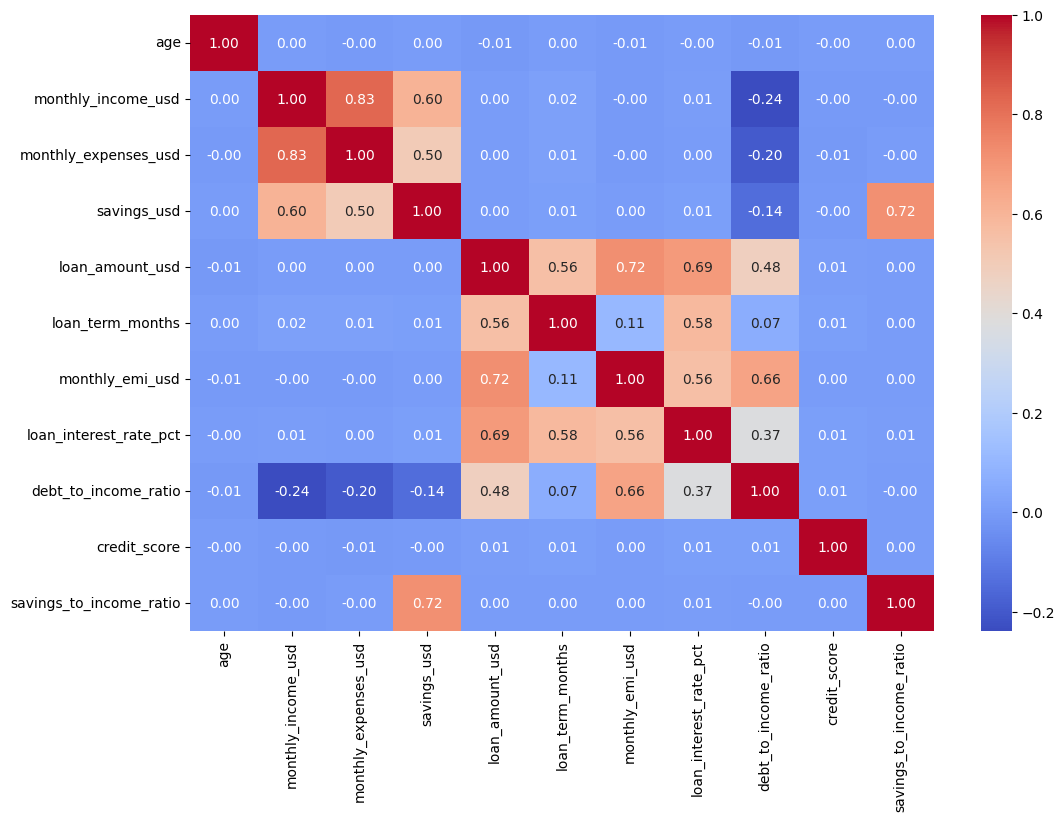

In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:

df['loan_type'] = df['loan_type'].fillna('None')
categorical_cols = ['gender', 'education_level', 'employment_status', 'region', 'loan_type', 'has_loan']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
numerical_cols = ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 
                  'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 
                  'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit_score', 
                  'savings_to_income_ratio']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [15]:
df['savings_usd'].head()

0    0.494699
1    0.257358
2    0.151535
3    0.374144
4    0.619707
Name: savings_usd, dtype: float64

In [16]:

df['savings_usd'] = np.log1p(df['savings_usd'])


In [17]:
df['savings_usd'].head()

0    0.401925
1    0.229012
2    0.141096
3    0.317831
4    0.482245
Name: savings_usd, dtype: float64

In [19]:
from sklearn.impute import KNNImputer 
temp_df = df[numerical_cols].copy()
imputer = KNNImputer(n_neighbors=5)
temp_df_imputed = imputer.fit_transform(temp_df)
df[numerical_cols] = pd.DataFrame(temp_df_imputed, columns=numerical_cols, index=df.index)

In [20]:
df.head()

user_id       age  gender  education_level  employment_status    job_title  \
0  U00001  0.840174       0                1                  1  Salesperson   
1  U00002 -1.630114       0                4                  0  Salesperson   
2  U00003 -1.563349       0                2                  0      Teacher   
3  U00004 -1.229526       1                4                  0      Manager   
4  U00005  0.639880       0                4                  0      Student   

   monthly_income_usd  monthly_expenses_usd  savings_usd  has_loan  loan_type  \
0           -0.258863             -0.890546     0.401925         0          4   
1           -0.258842             -0.037048     0.229012         1          2   
2           -0.640865             -1.019198     0.141096         0          4   
3            0.974057              1.454904     0.317831         1          0   
4            0.574447              1.237094     0.482245         0          4   

   loan_amount_usd  loan_term_months  monthly_emi_usd  loan_interest_rate_pct  \
0        -0.656343         -0.557867        -0.477399               -0.698454   
1         0.302939         -0.214564         0.287167                0.708730   
2        -0.656343         -0.557867        -0.477399               -0.698454   
3        -0.045055         -0.328998         0.283010                1.827721   
4        -0.656343         -0.557867        -0.477399               -0.698454   

   debt_to_income_ratio  credit_score  savings_to_income_ratio  region  \
0             -0.317626     -0.913468                 1.274706       4   
1              0.054525     -0.202869                 0.390899       3   
2             -0.317626      1.124001                 0.639908       0   
3             -0.094335     -0.718525                -0.257928       2   
4             -0.317626     -0.372658                 0.860860       0   

  record_date  
0  2024-01-09  
1  2022-02-13  
2  2022-05-12  
3  2023-10-02  
4  2021-08-07

In [21]:
X = df.drop(columns=['user_id', 'job_title', 'record_date'])
y = df['has_loan']

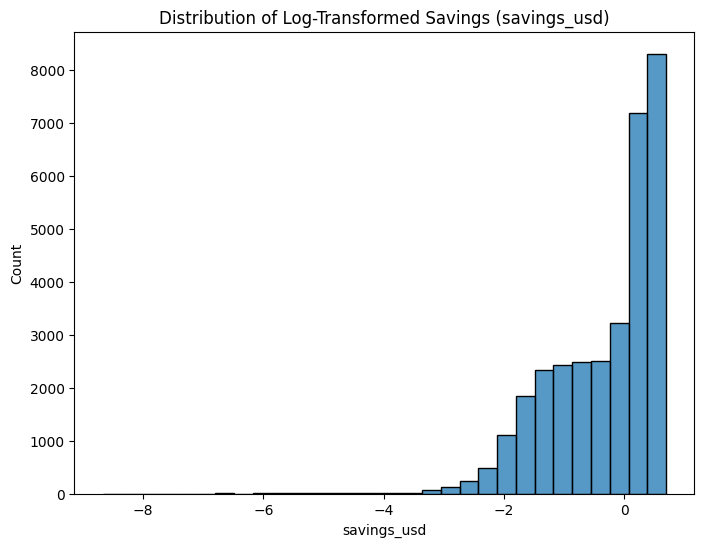

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['savings_usd'], bins=30)
plt.title('Distribution of Log-Transformed Savings (savings_usd)')
plt.show()

In [23]:
df['net_savings'] = df['monthly_income_usd'] - df['monthly_expenses_usd']

In [24]:
X = df.drop(columns=['user_id', 'job_title', 'record_date', 'has_loan'])
y = df['has_loan']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [26]:

results = {}

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # –°–±–æ—Ä –º–µ—Ç—Ä–∏–∫
    results[name] = {
        'CV ROC-AUC': np.mean(cv_scores),
        'CV Std': np.std(cv_scores),
        'Test ROC-AUC': roc_auc_score(y_test, y_proba),
        'Precision (Class 0)': classification_report(y_test, y_pred, output_dict=True)['0']['precision'],
        'Recall (Class 0)': classification_report(y_test, y_pred, output_dict=True)['0']['recall'],
        'Precision (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        'Recall (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        'F1-Score (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    }


results_df = pd.DataFrame(results).T


results_df = results_df.round(3)


styled = results_df.style.background_gradient(cmap='Blues', subset=['CV ROC-AUC', 'Test ROC-AUC']) \
                        .background_gradient(cmap='Greens', subset=['F1-Score (Class 1)']) \
                        .format(precision=3)


styled

–¢–∞–∫–æ–≥–æ –Ω–µ –±—ã–≤–∞–µ—Ç –Ω—É–∂–Ω–æ –Ω–∞–π—Ç–∏ —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö


üîù –¢–æ–ø-10 —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ Random Forest:


C:\Users\user\AppData\Local\Temp\ipykernel_16572\840836629.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='importance', y='feature', palette='viridis')


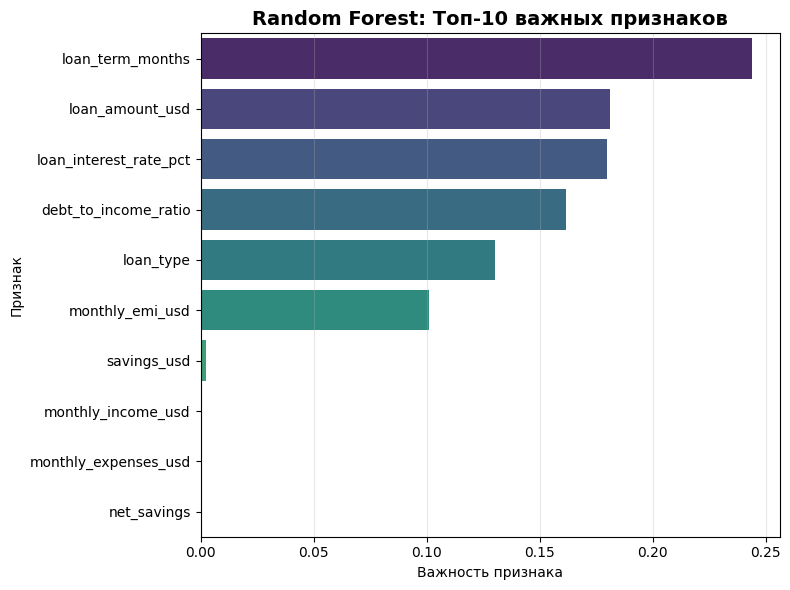

In [27]:
# ===================================================
# üîç –ê–Ω–∞–ª–∏–∑ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö —É—Ç–µ—á–µ–∫ –¥–∞–Ω–Ω—ã—Ö (Data Leakage Check)
# ===================================================
# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ "—Å–ª–∏—à–∫–æ–º —Ö–æ—Ä–æ—à–∏" ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–∏ —Å–æ–¥–µ—Ä–∂–∞—Ç —É—Ç–µ—á–∫—É –±—É–¥—É—â–µ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ X —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–µ –≤–∫–ª—é—á–∞–µ—Ç —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é)
# X —É–∂–µ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω –¥–æ train_test_split ‚Äî –∏—Å–ø–æ–ª—å–∑—É–µ–º –µ–≥–æ

# –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_names = X.columns.tolist()

# -----------------------------------------------
# 1. –û–±—É—á–∏–º Random Forest, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å
# -----------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("üîù –¢–æ–ø-10 —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ Random Forest:")
display(importance_df.head(10).style.format({'importance': '{:.4f}'}))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 6))
top10 = importance_df.head(10)
sns.barplot(data=top10, x='importance', y='feature', palette='viridis')
plt.title('Random Forest: –¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤', fontsize=14, fontweight='bold')
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [30]:
# -----------------------------------------------
# 2. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (—á–µ—Ä–µ–∑ point-biserial)
# -----------------------------------------------
from scipy.stats import pointbiserialr

correlations = []
for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'float64']:
        corr, _ = pointbiserialr(y_train, X_train[col])
        correlations.append({'feature': col, 'biserial_corr': corr, 'abs_corr': abs(corr)})

correlation_df = pd.DataFrame(correlations).sort_values('abs_corr', ascending=False)

print("\n\nüîó –°–∏–ª–∞ —Å–≤—è–∑–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (point-biserial correlation):")
display(correlation_df.head(10).style.format({'biserial_corr': '{:+.3f}', 'abs_corr': '{:.3f}'})
                            .background_gradient(cmap='coolwarm', subset=['biserial_corr']))

# -----------------------------------------------
# 3. –ß–µ–∫-–ª–∏—Å—Ç: –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —É—Ç–µ—á–∫–æ–π?
# -----------------------------------------------

leakage_check = pd.DataFrame({
    '–ü—Ä–∏–∑–Ω–∞–∫': correlation_df['feature'],
    '–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å y': correlation_df['biserial_corr'],
    'RF Importance': [importance_df.set_index('feature').loc[f, 'importance'] 
                      if f in importance_df['feature'].values else 0 
                      for f in correlation_df['feature']],
    '–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π': [
        '‚ö†Ô∏è EMI –ø–æ —ç—Ç–æ–º—É –∫—Ä–µ–¥–∏—Ç—É ‚Äî –ù–ï –î–û–õ–ñ–ï–ù –±—ã—Ç—å –¥–æ—Å—Ç—É–ø–µ–Ω!' if 'emi' in f.lower() else
        '‚ö†Ô∏è –°–æ–¥–µ—Ä–∂–∏—Ç –¥–æ–ª–≥ –ø–æ –∫—Ä–µ–¥–∏—Ç—É ‚Äî –º–æ–∂–µ—Ç –±—ã—Ç—å —É—Ç–µ—á–∫–æ–π' if 'debt' in f.lower() else
        '‚ö†Ô∏è –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–±–µ—Ä–µ–∂–µ–Ω–∏–π –∫ –¥–æ—Ö–æ–¥—É ‚Äî –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞—Å—á—ë—Ç–Ω—ã–º' if 'savings_to_income' in f else
        '‚ö†Ô∏è –ü—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è —Å—Ç–∞–≤–∫–∞ ‚Äî –º–æ–∂–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç —Ä–µ—à–µ–Ω–∏—è' if 'interest' in f.lower() else
        '‚úÖ –û–±—ã—á–Ω–æ –¥–æ—Å—Ç—É–ø–µ–Ω' for f in correlation_df['feature']
    ]
})

# –í—ã–¥–µ–ª—è–µ–º –∫—Ä–∞—Å–Ω—ã–º –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã–µ
def highlight_risk(row):
    return ['background-color: pink' if '‚ö†Ô∏è' in row['–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π'] else '' for _ in row]

print("\n\nüìå –†—É—á–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —É—Ç–µ—á–∫–∏ ‚Äî –∑–∞–ø–æ–ª–Ω–∏ –∫–æ–ª–æ–Ω–∫—É '–î–æ—Å—Ç—É–ø–µ–Ω –î–û?'")
display(leakage_check.style.format({
    '–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å y': '{:+.3f}',
    'RF Importance': '{:.4f}'
}).apply(highlight_risk, axis=1))



üîó –°–∏–ª–∞ —Å–≤—è–∑–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (point-biserial correlation):




üìå –†—É—á–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —É—Ç–µ—á–∫–∏ ‚Äî –∑–∞–ø–æ–ª–Ω–∏ –∫–æ–ª–æ–Ω–∫—É '–î–æ—Å—Ç—É–ø–µ–Ω –î–û?'


In [48]:

from sklearn.metrics import roc_auc_score

print("–ü—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—á—Ç–∏ –∏–¥–µ–∞–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—Ç y:")
for col in X_clean.columns:
    try:
        auc = roc_auc_score(y, X_clean[col])
        if auc > 0.95 or auc < 0.05:
            print(f"  {col}: ROC-AUC = {abs(auc - 0.5)*2 + 0.5:.3f}")
    except:
        continue

–ü—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—á—Ç–∏ –∏–¥–µ–∞–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—Ç y:
  loan_type: ROC-AUC = 1.500
  loan_amount_usd: ROC-AUC = 1.500
  loan_term_months: ROC-AUC = 1.500


In [55]:
# –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –ù–ï –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –¥–æ—Å—Ç—É–ø–Ω—ã –î–û —Ä–µ—à–µ–Ω–∏—è –æ –∫—Ä–µ–¥–∏—Ç–µ

leakage_features = [
    'loan_interest_rate_pct',        # ‚ùå –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –ü–û–°–õ–ï –æ—Ü–µ–Ω–∫–∏ —Ä–∏—Å–∫–∞ ‚Üí —É—Ç–µ—á–∫–∞
    'monthly_emi_usd',               # ‚ùå –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –æ—Ç —Å—É–º–º—ã, —Å—Ä–æ–∫–∞ –∏ —Å—Ç–∞–≤–∫–∏ ‚Üí —É—Ç–µ—á–∫–∞
    'debt_to_income_ratio',          # ‚ùå –ï—Å–ª–∏ –≤–∫–ª—é—á–∞–µ—Ç –¥–æ–ª–≥ –ø–æ –≠–¢–û–ú–£ –∫—Ä–µ–¥–∏—Ç—É ‚Üí —É—Ç–µ—á–∫–∞
    'savings_to_income_ratio',
    'loan_type',
    'credit_score',
    'savings_usd',
    
]

# –£–¥–∞–ª—è–µ–º –∏–∑ X
X_clean = X.drop(columns=leakage_features, errors='ignore')  # errors='ignore' ‚Äî –Ω–∞ —Å–ª—É—á–∞–π, –µ—Å–ª–∏ –∫–∞–∫–æ–≥–æ-—Ç–æ –Ω–µ—Ç

print("–£–¥–∞–ª–µ–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏-—É—Ç–µ—á–∫–∏:")
print(leakage_features)
print(f"–û—Å—Ç–∞–ª–æ—Å—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {X_clean.shape[1]}")

–£–¥–∞–ª–µ–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏-—É—Ç–µ—á–∫–∏:
['loan_interest_rate_pct', 'monthly_emi_usd', 'debt_to_income_ratio', 'savings_to_income_ratio', 'loan_type', 'credit_score', 'savings_usd']
–û—Å—Ç–∞–ª–æ—Å—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 10


In [56]:
from sklearn.model_selection import train_test_split

X_train_clean, X_test_clean, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

print("–†–∞–∑–º–µ—Ä—ã –Ω–æ–≤—ã—Ö –≤—ã–±–æ—Ä–æ–∫:")
print(f"X_train: {X_train_clean.shape}, X_test: {X_test_clean.shape}")

–†–∞–∑–º–µ—Ä—ã –Ω–æ–≤—ã—Ö –≤—ã–±–æ—Ä–æ–∫:
X_train: (25939, 10), X_test: (6485, 10)


In [57]:

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100),
}

# –•—Ä–∞–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
results_clean = {}

print("üîÅ –ü–µ—Ä–µ—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—á–∏—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–±–µ–∑ —É—Ç–µ—á–µ–∫)...\n")
print("="*80)

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train_clean, y_train, cv=5, scoring='roc_auc')
    
    # –û–±—É—á–µ–Ω–∏–µ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    model.fit(X_train_clean, y_train)
    y_pred = model.predict(X_test_clean)
    y_proba = model.predict_proba(X_test_clean)[:, 1]
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
    results_clean[name] = {
        'CV ROC-AUC': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test ROC-AUC': roc_auc_score(y_test, y_proba),
        'F1-Score (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    }
    
    # –í—ã–≤–æ–¥
    print(f"\n{name}:")
    print(f"  CV ROC-AUC:     {cv_scores.mean():.3f} ¬± {cv_scores.std():.3f}")
    print(f"  Test ROC-AUC:   {results_clean[name]['Test ROC-AUC']:.3f}")
    print(f"  F1-Score (1):   {results_clean[name]['F1-Score (Class 1)']:.3f}")

üîÅ –ü–µ—Ä–µ—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—á–∏—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–±–µ–∑ —É—Ç–µ—á–µ–∫)...


Logistic Regression:
  CV ROC-AUC:     1.000 ¬± 0.000
  Test ROC-AUC:   1.000
  F1-Score (1):   0.995

Random Forest:
  CV ROC-AUC:     1.000 ¬± 0.000
  Test ROC-AUC:   1.000
  F1-Score (1):   1.000
